# I. Library & Module

## 1. Library

In [51]:
# ========================== Core Utilities ==========================
import os
import re
import math
import random
import warnings
from datetime import datetime
from itertools import combinations
from collections import Counter
from typing import List, Tuple, Dict, Optional

# ========================== Scientific Computing ==========================
import numpy as np
import pandas as pd
import scipy
from scipy.stats import skew

# ========================== Visualization ==========================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import mplcursors
from matplotlib.colors import LinearSegmentedColormap

# ========================== Progress Tracking ==========================
from tqdm.notebook import tqdm
tqdm.pandas()

# ========================== Preprocessing ==========================
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.preprocessing import (
    LabelEncoder, MinMaxScaler, OneHotEncoder,
    OrdinalEncoder, StandardScaler
)

# ========================== Model Selection & Evaluation ==========================
from sklearn.model_selection import (
    GridSearchCV, KFold, ParameterGrid, RandomizedSearchCV,
    StratifiedKFold, cross_val_predict, cross_val_score,
    train_test_split, learning_curve
)

from sklearn.metrics import (
    accuracy_score, auc, classification_report, confusion_matrix,
    f1_score, make_scorer, precision_recall_curve,
    precision_score, recall_score, roc_auc_score, roc_curve
)
from imblearn.metrics import classification_report_imbalanced

# ========================== Pipelines ==========================
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline as imbalanced_make_pipeline

# ========================== Imbalanced Data Handling ==========================
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# ========================== Scikit-learn Models ==========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

# ========================== Gradient Boosting Models ==========================
import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv


## 2. Module

In [2]:
from Training_Model_Module import (
    train_dev_test,                   # Hàm thực hiện tách train_dev_test tỉ lệ 6:2:2 
    evaluate_model,                     # Hàm thực hiện đánh giá mô hình trên tập dev và test
    optimize_threshold_by_f1,           # Hàm thực hiện tối ưu hoá ngưỡng phân loại
    tune_logistic_regression_gridsearch,# Hàm thực hiện tuning mô hình Logistic  
    tune_lightgbm_gridsearch,           # Hàm thực hiện tuning mô hình LightGBM
    tune_gaussian_nb_gridsearch,        # Hàm thực hiện tuning mô hình Gaussian (Naive Bayes)
    tune_xgboost_gridsearch,            # Hàm thực hiện tuning mô hình XGBoost
    tune_random_forest_gridsearch,      # Hàm thực hiện tuning mô hình Random Forest
    tune_svm_gridsearch,                # Hàm thực hiện tuning mô hình Support Vector Machine
    tune_knn_gridsearch,                # Hàm thực hiện tuning mô hình K-Neighbors Nearest
    tune_catboost_gridsearch,           # Hàm thực hiện tuning mô hình CatBoost
    tune_decision_tree_gridsearch,      # Hàm thực hiện tuning mô hình Decision Tree
    tune_mlp_gridsearch                 # Hàm thực hiện tuning mô hình Multilayer Perceptron
)

Training with only "reviews" feature

In [15]:
warnings.filterwarnings ('ignore')
pd.set_option ('display.width', None)
pd.set_option ('display.max_rows', 100)
pd.set_option ('display.max_columns', 50)

# II. Read training data

## 1. X - data

In [54]:
embeddings_array = np.load("labse_embeddings.npy")
embeddings_array_xlmr = np.load ("xlmr_embeddings.npy")
embeddings_array

array([[-0.02895994,  0.03712187, -0.06790695, ..., -0.02930346,
        -0.04716385,  0.00677341],
       [-0.0333856 , -0.03175878, -0.06721564, ...,  0.00271739,
         0.00867946,  0.05059093],
       [ 0.00660323, -0.04726679, -0.02694022, ..., -0.02714309,
        -0.00652256,  0.01934366],
       ...,
       [-0.00431194,  0.03046839, -0.04788684, ...,  0.04918   ,
        -0.03824934,  0.02170216],
       [ 0.00642821,  0.01797423, -0.04393002, ...,  0.02430964,
        -0.01071317,  0.04692739],
       [ 0.0314241 ,  0.05051486, -0.02809175, ...,  0.04702561,
        -0.0168322 ,  0.04901554]], shape=(10194, 768), dtype=float32)

In [4]:
len (embeddings_array)

10194

In [55]:
len (embeddings_array_xlmr)

10194

Ứng với 10194 reviews (bao gồm tiếng Việt và tiếng Anh)

## 2. y - data

In [26]:
df = pd.read_csv ('Hypothesis_Testing_Data.csv')
df.drop (['Unnamed: 0', 'Content'], axis=1, inplace=True)
df["Word_Count"] = df["Content_cleaned"].apply(lambda x: len(str(x).split()))
df = df[[
    'Content_cleaned', 'Word_Count', 'language', 
    'Review_Weeks_Ago','Review_Months_Ago', 'Review_Years_Ago', 
    'Rating_Score', 'Likes', 'label', 'label_encoded'
]]
df

,Content_cleaned,Word_Count,language,Review_Weeks_Ago,Review_Months_Ago,Review_Years_Ago,Rating_Score,Likes,label,label_encoded
0,"nhân viên không thuyết mình trên xe, mà lại đi...",45,vi,295,68,5,1,0.0,NEG,0
1,đây là khu vui chơi mới nên tất cả còn tô...,32,vi,52,12,1,4,0.0,NEU,1
2,rất nhiều trò chơi thú vị. nhưng phần tham qua...,23,vi,52,12,1,5,0.0,NEU,1
3,bình thường thôi. trẻ em thì thích,7,vi,52,12,1,4,0.0,NEU,1
4,"xe buýt sạch sẽ, tài xế chạy an toàn. tuy nhiê...",41,vi,147,34,2,5,0.0,NEU,1
...,...,...,...,...,...,...,...,...,...,...
10189,had a really great tour with kevin it was real...,19,en,143,33,2,4,0.0,POS,2
10190,good tour with lovely people there were four g...,109,en,95,22,1,4,0.0,POS,2
10191,our tour guide alex was fantastic he was very ...,25,en,21,5,0,5,0.0,POS,2
10192,we had a great tour guided by lucy very inform...,30,en,300,69,5,5,0.0,POS,2


In [27]:
le = LabelEncoder()
df ["label_encoded"] = le.fit_transform(df ["label"])  # label = cột chứa 'POS', 'NEG', etc.

# Kiểm tra mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'NEG': np.int64(0), 'NEU': np.int64(1), 'POS': np.int64(2)}


X and Y Data

In [7]:
X = embeddings_array.copy ()
y = df ['label_encoded']

In [57]:
X_xlmr = embeddings_array_xlmr.copy ()

# III. Models Training

## 1. Logistic Regression

### Train with embeddings_array only (LaBSE)

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

🔍 Evaluation on Dev set:
Accuracy : 0.8798
Precision (macro): 0.8151
Recall (macro)   : 0.8008
F1-score (macro) : 0.8057

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.79      0.84      0.81       290
         NEU       0.73      0.60      0.66       349
         POS       0.93      0.96      0.94      1400

    accuracy                           0.88      2039
   macro avg       0.82      0.80      0.81      2039
weighted avg       0.88      0.88      0.88      2039



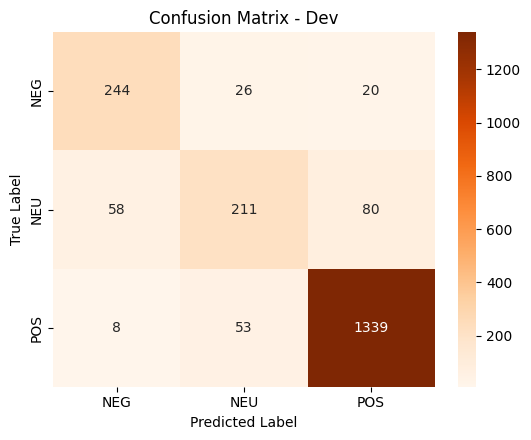


🔍 Evaluation on Test set:
Accuracy : 0.8808
Precision (macro): 0.8177
Recall (macro)   : 0.8024
F1-score (macro) : 0.8092

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.80      0.81      0.80       290
         NEU       0.72      0.64      0.68       349
         POS       0.93      0.95      0.94      1400

    accuracy                           0.88      2039
   macro avg       0.82      0.80      0.81      2039
weighted avg       0.88      0.88      0.88      2039



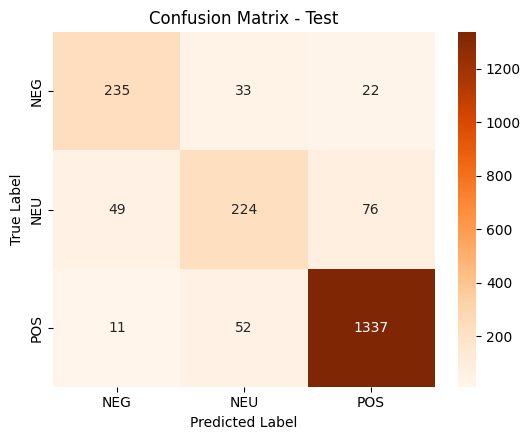

In [8]:
# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 2. Logistic Regression hyperparameter tunning
log_reg_best_params, results_df = tune_logistic_regression_gridsearch(X_train, y_train)
print("Best parameters:", log_reg_best_params)

# Bước 3. Train lại với hyperparmeter đã tuning
log_reg_model = LogisticRegression(**log_reg_best_params)
log_reg_model.fit(X_train, y_train)

# Bước 4. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = log_reg_model.predict(X_dev)
y_test_pred = log_reg_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array XLM-R
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ XLM-R và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago


🔍 Evaluation on Dev set:
Accuracy : 0.8921
Precision (macro): 0.8336
Recall (macro)   : 0.8161
F1-score (macro) : 0.8228

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.81      0.86      0.83       290
         NEU       0.75      0.63      0.68       349
         POS       0.94      0.97      0.95      1400

    accuracy                           0.89      2039
   macro avg       0.83      0.82      0.82      2039
weighted avg       0.89      0.89      0.89      2039



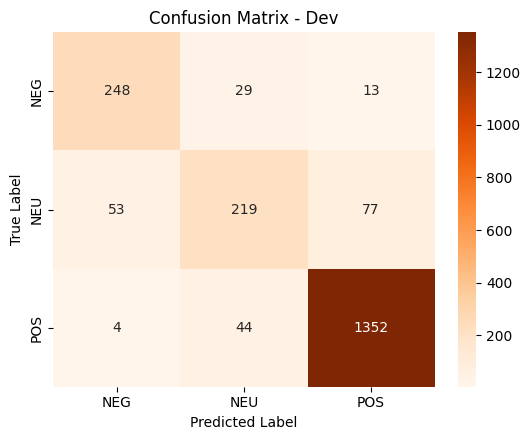


🔍 Evaluation on Test set:
Accuracy : 0.8916
Precision (macro): 0.8323
Recall (macro)   : 0.8117
F1-score (macro) : 0.8215

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.81      0.82       290
         NEU       0.72      0.66      0.69       349
         POS       0.94      0.97      0.95      1400

    accuracy                           0.89      2039
   macro avg       0.83      0.81      0.82      2039
weighted avg       0.89      0.89      0.89      2039



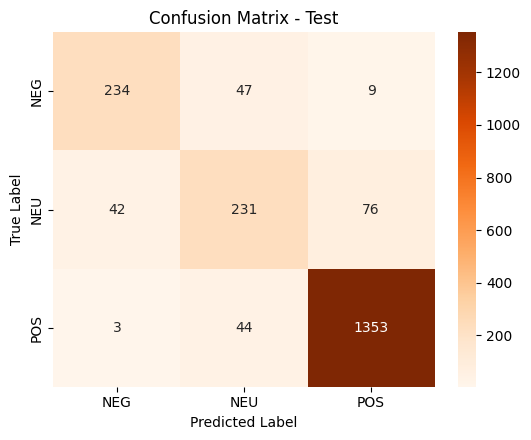

In [ ]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array_xlmr, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 2. Logistic Regression hyperparameter tunning
log_reg_best_params_3, results_df = tune_logistic_regression_gridsearch(X_train, y_train)
print("Best parameters:", log_reg_best_params_3)

# Bước 3. Train lại với hyperparmeter đã tuning
log_reg_model = LogisticRegression(**log_reg_best_params_3)
log_reg_model.fit(X_train, y_train)

# Bước 4. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = log_reg_model.predict(X_dev)
y_test_pred = log_reg_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array LaBSE
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ LaBSE và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

🔍 Evaluation on Dev set:
Accuracy : 0.8936
Precision (macro): 0.8333
Recall (macro)   : 0.8256
F1-score (macro) : 0.8262

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.80      0.90      0.85       290
         NEU       0.76      0.62      0.68       349
         POS       0.94      0.96      0.95      1400

    accuracy                           0.89      2039
   macro avg       0.83      0.83      0.83      2039
weighted avg       0.89      0.89      0.89      2039



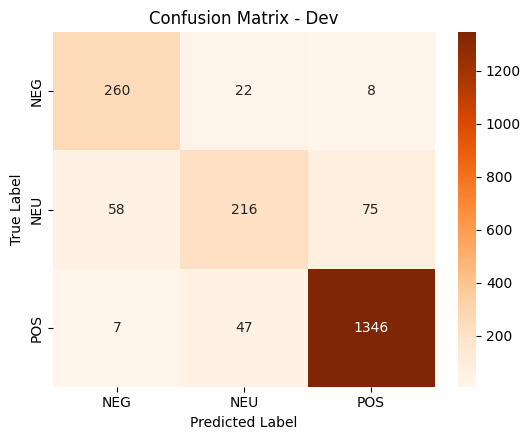


🔍 Evaluation on Test set:
Accuracy : 0.8941
Precision (macro): 0.8333
Recall (macro)   : 0.8273
F1-score (macro) : 0.8294

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.81      0.86      0.84       290
         NEU       0.74      0.66      0.70       349
         POS       0.95      0.96      0.95      1400

    accuracy                           0.89      2039
   macro avg       0.83      0.83      0.83      2039
weighted avg       0.89      0.89      0.89      2039



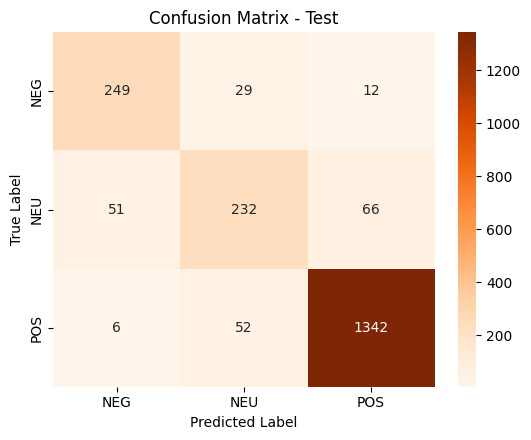

In [ ]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 2. Logistic Regression hyperparameter tunning
log_reg_best_params, results_df = tune_logistic_regression_gridsearch(X_train, y_train)
print("Best parameters:", log_reg_best_params)

# Bước 3. Train lại với hyperparmeter đã tuning
log_reg_model = LogisticRegression(**log_reg_best_params)
log_reg_model.fit(X_train, y_train)

# Bước 4. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = log_reg_model.predict(X_dev)
y_test_pred = log_reg_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

## 2. Naive Bayes

### Train with embeddings_array only (LaBSE)

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'var_smoothing': 1e-09}

🔍 Evaluation on Dev set:
Accuracy : 0.7911
Precision (macro): 0.6933
Recall (macro)   : 0.7775
F1-score (macro) : 0.7221

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.61      0.86      0.71       290
         NEU       0.50      0.66      0.57       349
         POS       0.97      0.81      0.88      1400

    accuracy                           0.79      2039
   macro avg       0.69      0.78      0.72      2039
weighted avg       0.84      0.79      0.80      2039



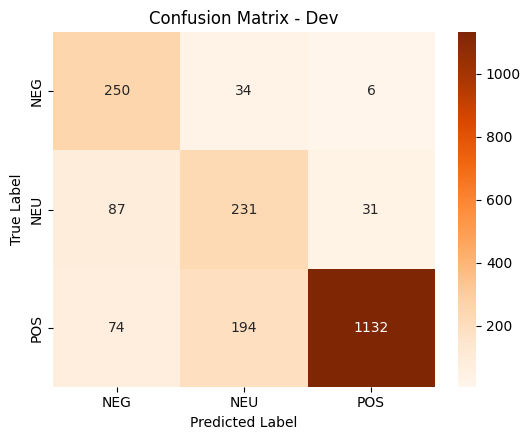


🔍 Evaluation on Test set:
Accuracy : 0.7881
Precision (macro): 0.6963
Recall (macro)   : 0.7763
F1-score (macro) : 0.7233

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.63      0.83      0.72       290
         NEU       0.49      0.70      0.58       349
         POS       0.97      0.80      0.88      1400

    accuracy                           0.79      2039
   macro avg       0.70      0.78      0.72      2039
weighted avg       0.84      0.79      0.80      2039



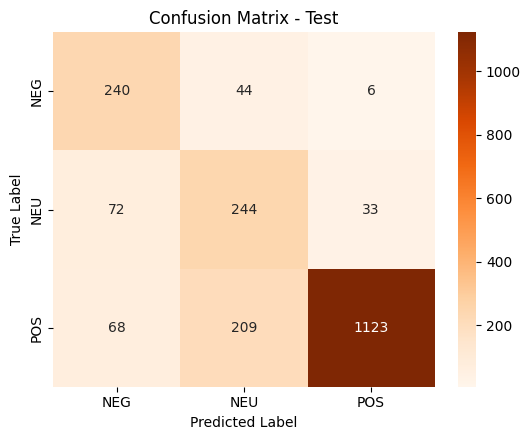

In [9]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
naive_bayes_best_params, results_df = tune_gaussian_nb_gridsearch(X_train, y_train)
print("Best parameters:", naive_bayes_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
naive_bayes_model = GaussianNB(**naive_bayes_best_params)
naive_bayes_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = naive_bayes_model.predict(X_dev)
y_test_pred = naive_bayes_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array XLM-R
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ XLM-R và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'var_smoothing': 1e-05}

🔍 Evaluation on Dev set:
Accuracy : 0.6896
Precision (macro): 0.6294
Recall (macro)   : 0.6856
F1-score (macro) : 0.6336

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.60      0.72      0.66       290
         NEU       0.34      0.64      0.44       349
         POS       0.95      0.69      0.80      1400

    accuracy                           0.69      2039
   macro avg       0.63      0.69      0.63      2039
weighted avg       0.79      0.69      0.72      2039



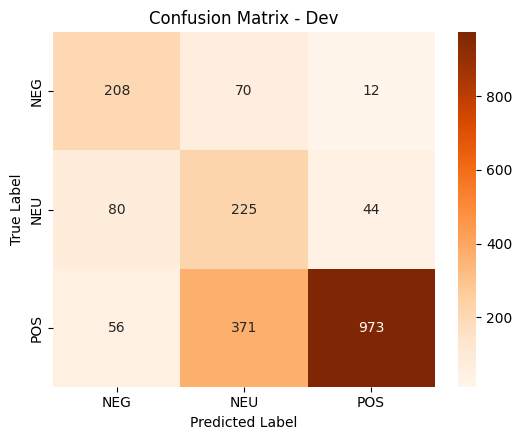


🔍 Evaluation on Test set:
Accuracy : 0.691
Precision (macro): 0.6403
Recall (macro)   : 0.6954
F1-score (macro) : 0.6436

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.64      0.74      0.69       290
         NEU       0.34      0.66      0.45       349
         POS       0.94      0.69      0.79      1400

    accuracy                           0.69      2039
   macro avg       0.64      0.70      0.64      2039
weighted avg       0.79      0.69      0.72      2039



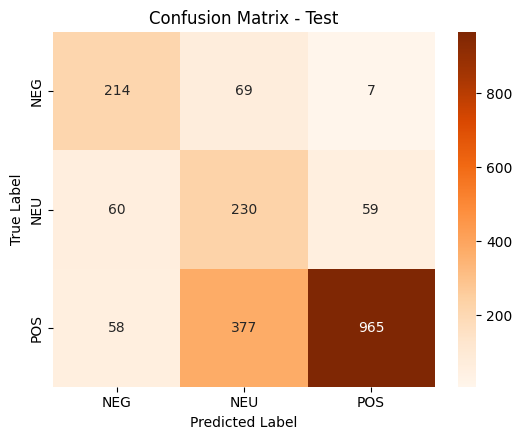

In [62]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array_xlmr, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 2. Logistic Regression hyperparameter tunning
naive_bayes_best_params_3, results_df = tune_gaussian_nb_gridsearch(X_train, y_train)
print("Best parameters:", naive_bayes_best_params_3)

# Bước 3. Train lại với hyperparmeter đã tuning
naive_bayes_model_3 = GaussianNB(**naive_bayes_best_params_3)
naive_bayes_model.fit(X_train, y_train)

# Bước 4. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = naive_bayes_model.predict(X_dev)
y_test_pred = naive_bayes_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array LaBSE
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ LaBSE và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'var_smoothing': 1e-05}

🔍 Evaluation on Dev set:
Accuracy : 0.8009
Precision (macro): 0.7062
Recall (macro)   : 0.79
F1-score (macro) : 0.7355

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.64      0.87      0.74       290
         NEU       0.51      0.68      0.58       349
         POS       0.97      0.82      0.89      1400

    accuracy                           0.80      2039
   macro avg       0.71      0.79      0.74      2039
weighted avg       0.85      0.80      0.81      2039



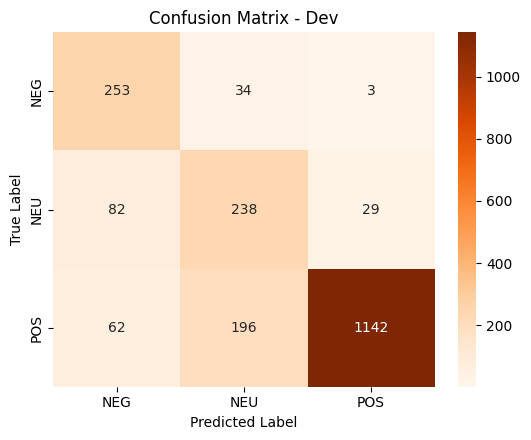


🔍 Evaluation on Test set:
Accuracy : 0.7901
Precision (macro): 0.7011
Recall (macro)   : 0.7803
F1-score (macro) : 0.7276

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.65      0.83      0.73       290
         NEU       0.49      0.71      0.58       349
         POS       0.97      0.80      0.88      1400

    accuracy                           0.79      2039
   macro avg       0.70      0.78      0.73      2039
weighted avg       0.84      0.79      0.80      2039



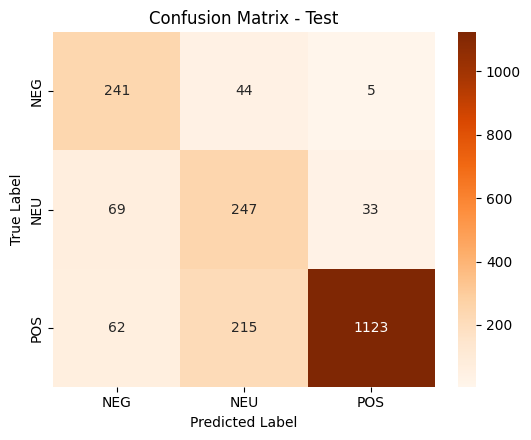

In [39]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 5. Naive Bayes hyperparameter tunning
naive_bayes_best_params, results_df = tune_gaussian_nb_gridsearch(X_train, y_train)
print("Best parameters:", naive_bayes_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
naive_bayes_model = GaussianNB(**naive_bayes_best_params)
naive_bayes_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = naive_bayes_model.predict(X_dev)
y_test_pred = naive_bayes_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

## 3. K-Neighbors Nearest

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

🔍 Evaluation on Dev set:
Accuracy : 0.8151
Precision (macro): 0.7157
Recall (macro)   : 0.6675
F1-score (macro) : 0.686

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.67      0.62      0.65       290
         NEU       0.60      0.43      0.50       349
         POS       0.88      0.95      0.91      1400

    accuracy                           0.82      2039
   macro avg       0.72      0.67      0.69      2039
weighted avg       0.80      0.82      0.80      2039



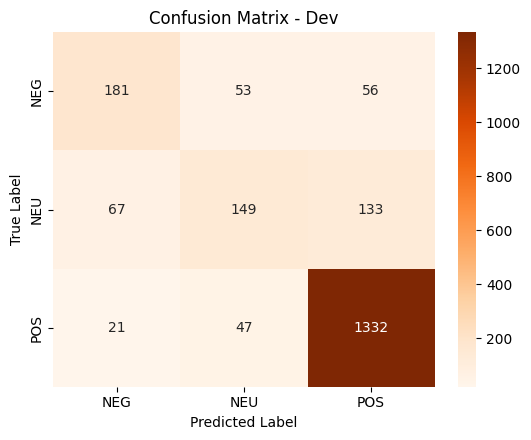


🔍 Evaluation on Test set:
Accuracy : 0.8195
Precision (macro): 0.7303
Recall (macro)   : 0.6777
F1-score (macro) : 0.6985

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.73      0.65      0.69       290
         NEU       0.59      0.43      0.50       349
         POS       0.87      0.95      0.91      1400

    accuracy                           0.82      2039
   macro avg       0.73      0.68      0.70      2039
weighted avg       0.80      0.82      0.81      2039



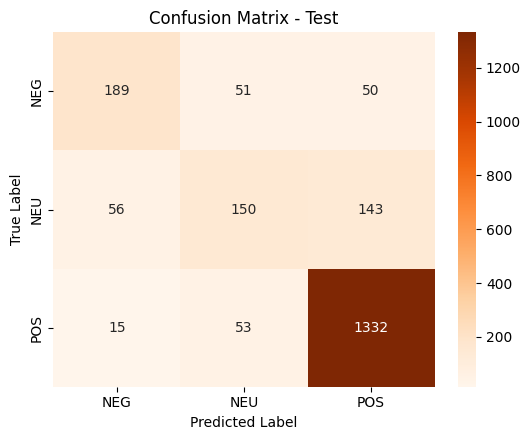

In [10]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
knn_best_params, results_df = tune_knn_gridsearch(X_train, y_train)
print("Best parameters:", knn_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = knn_model.predict(X_dev)
y_test_pred = knn_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

🔍 Evaluation on Dev set:
Accuracy : 0.8426
Precision (macro): 0.7746
Recall (macro)   : 0.7123
F1-score (macro) : 0.7366

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.81      0.72      0.76       290
         NEU       0.63      0.45      0.52       349
         POS       0.88      0.97      0.92      1400

    accuracy                           0.84      2039
   macro avg       0.77      0.71      0.74      2039
weighted avg       0.83      0.84      0.83      2039



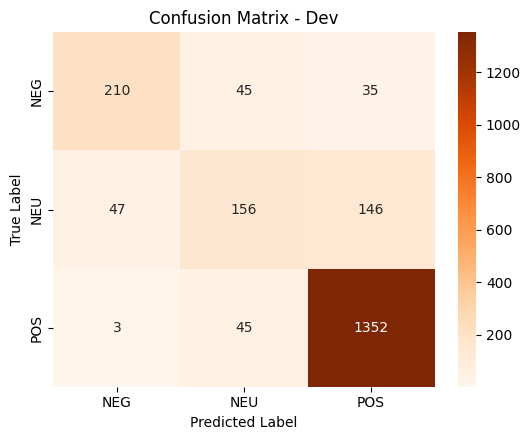


🔍 Evaluation on Test set:
Accuracy : 0.8352
Precision (macro): 0.7613
Recall (macro)   : 0.6985
F1-score (macro) : 0.7223

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.81      0.72      0.76       290
         NEU       0.60      0.41      0.49       349
         POS       0.88      0.96      0.92      1400

    accuracy                           0.84      2039
   macro avg       0.76      0.70      0.72      2039
weighted avg       0.82      0.84      0.82      2039



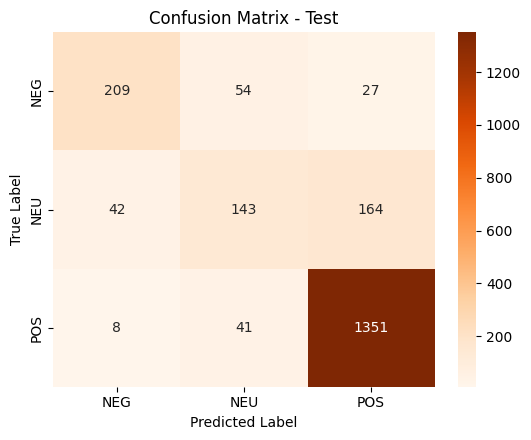

In [40]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 5. Naive Bayes hyperparameter tunning
knn_best_params, results_df = tune_knn_gridsearch(X_train, y_train)
print("Best parameters:", knn_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = knn_model.predict(X_dev)
y_test_pred = knn_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

## 4. Support Vector Machine

### Train with embeddings_array only (LaBSE)

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

🔍 Evaluation on Dev set:
Accuracy : 0.8852
Precision (macro): 0.8187
Recall (macro)   : 0.8122
F1-score (macro) : 0.8148

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.80      0.83      0.82       290
         NEU       0.71      0.65      0.68       349
         POS       0.94      0.95      0.95      1400

    accuracy                           0.89      2039
   macro avg       0.82      0.81      0.81      2039
weighted avg       0.88      0.89      0.88      2039



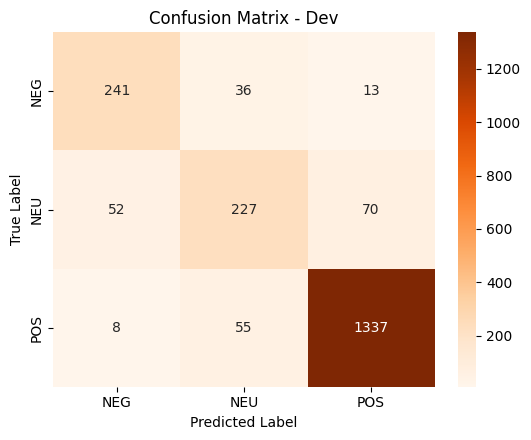


🔍 Evaluation on Test set:
Accuracy : 0.8867
Precision (macro): 0.8203
Recall (macro)   : 0.8152
F1-score (macro) : 0.8177

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.81      0.80      0.80       290
         NEU       0.71      0.70      0.70       349
         POS       0.95      0.95      0.95      1400

    accuracy                           0.89      2039
   macro avg       0.82      0.82      0.82      2039
weighted avg       0.89      0.89      0.89      2039



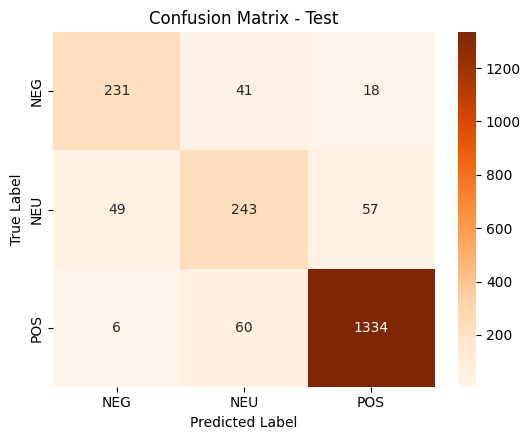

In [11]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
svm_best_params, results_df = tune_svm_gridsearch(X_train, y_train)
print("Best parameters:", svm_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
svm_model = SVC(**svm_best_params)
svm_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = svm_model.predict(X_dev)
y_test_pred = svm_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array XLM-R
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ XLM-R và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'C': 0.1, 'kernel': 'linear'}

🔍 Evaluation on Dev set:
Accuracy : 0.8941
Precision (macro): 0.8246
Recall (macro)   : 0.8305
F1-score (macro) : 0.8274

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.80      0.84      0.82       290
         NEU       0.71      0.70      0.71       349
         POS       0.96      0.95      0.96      1400

    accuracy                           0.89      2039
   macro avg       0.82      0.83      0.83      2039
weighted avg       0.89      0.89      0.89      2039



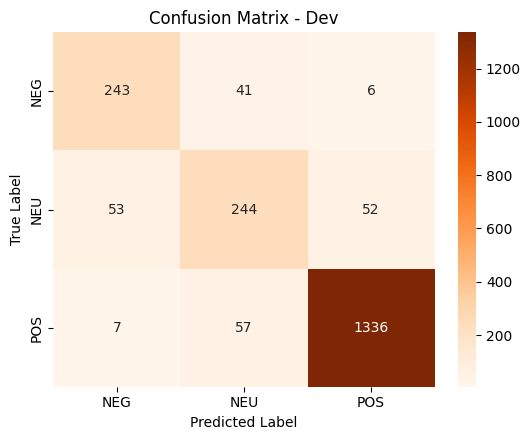


🔍 Evaluation on Test set:
Accuracy : 0.896
Precision (macro): 0.8344
Recall (macro)   : 0.8299
F1-score (macro) : 0.832

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.81      0.83       290
         NEU       0.71      0.72      0.71       349
         POS       0.96      0.96      0.96      1400

    accuracy                           0.90      2039
   macro avg       0.83      0.83      0.83      2039
weighted avg       0.90      0.90      0.90      2039



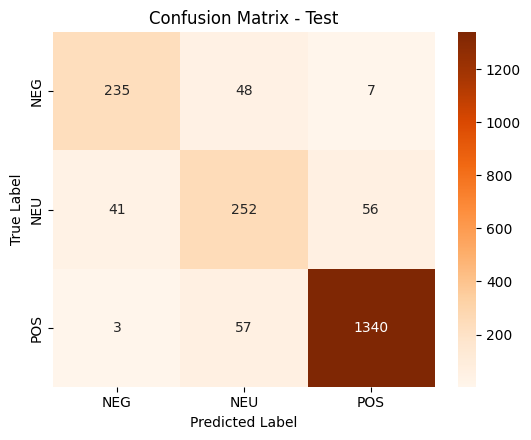

In [63]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array_xlmr, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 2. Logistic Regression hyperparameter tunning
svm_best_params_3, results_df = tune_svm_gridsearch(X_train, y_train)
print("Best parameters:", svm_best_params_3)

# Bước 3. Train lại với hyperparmeter đã tuning
svm_model_3 = SVC(**svm_best_params_3)
svm_model_3.fit(X_train, y_train)

# Bước 4. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = svm_model_3.predict(X_dev)
y_test_pred = svm_model_3.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array LaBSE
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ LaBSE và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'C': 1, 'kernel': 'linear'}

🔍 Evaluation on Dev set:
Accuracy : 0.897
Precision (macro): 0.8334
Recall (macro)   : 0.8342
F1-score (macro) : 0.8333

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.82      0.87      0.84       290
         NEU       0.73      0.68      0.70       349
         POS       0.95      0.96      0.96      1400

    accuracy                           0.90      2039
   macro avg       0.83      0.83      0.83      2039
weighted avg       0.90      0.90      0.90      2039



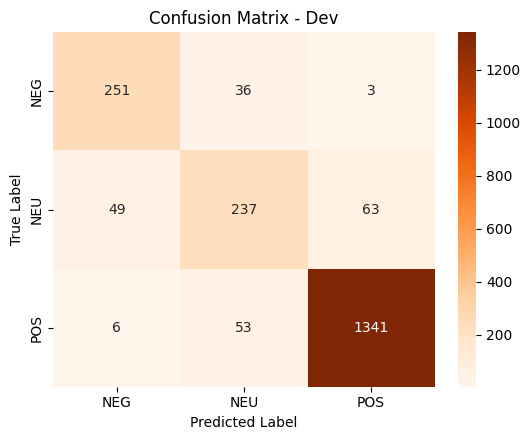


🔍 Evaluation on Test set:
Accuracy : 0.8995
Precision (macro): 0.8376
Recall (macro)   : 0.8439
F1-score (macro) : 0.8407

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.83      0.85      0.84       290
         NEU       0.73      0.73      0.73       349
         POS       0.96      0.95      0.96      1400

    accuracy                           0.90      2039
   macro avg       0.84      0.84      0.84      2039
weighted avg       0.90      0.90      0.90      2039



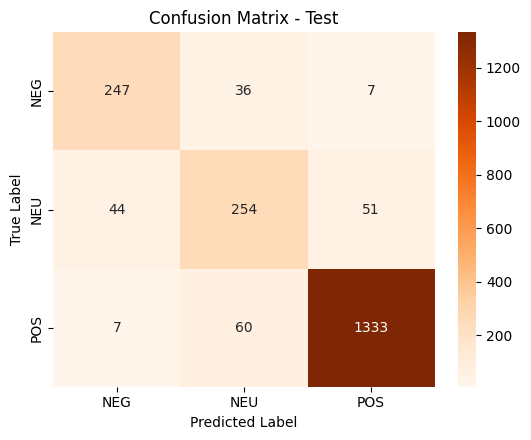

In [49]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 5. Naive Bayes hyperparameter tunning
svm_best_params, results_df = tune_svm_gridsearch(X_train, y_train)
print("Best parameters:", svm_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
svm_model = SVC(**svm_best_params, probability=True)
svm_model.fit(X_train, y_train, )

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = svm_model.predict(X_dev)
y_test_pred = svm_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

Multiclass ROC-AUC (macro): 0.9723


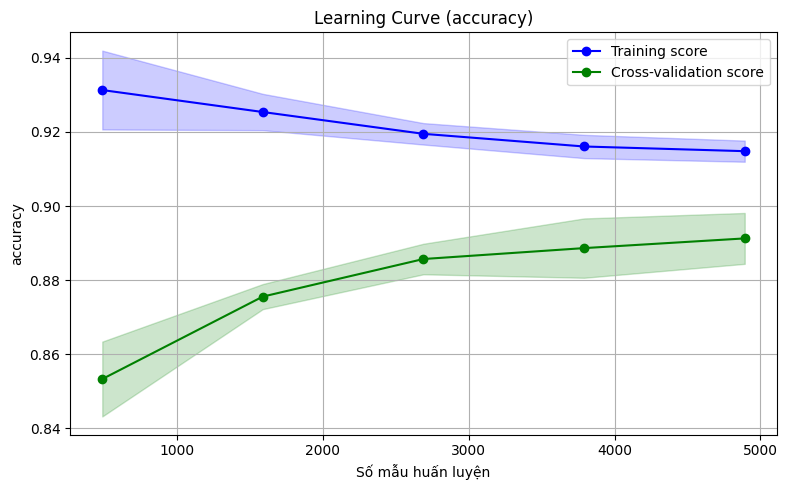

In [53]:
def compute_multiclass_roc_auc(model, X_test, y_test, average='macro'):
    """
    Tính ROC-AUC cho bài toán đa lớp.

    Parameters:
    - model: mô hình đã huấn luyện (phải có predict_proba)
    - X_test: tập dữ liệu test
    - y_test: nhãn thật (dạng số nguyên: 0, 1, 2, ...)
    - average: 'macro' (mặc định), 'weighted', hoặc 'micro'

    Returns:
    - roc_auc: điểm số ROC-AUC
    """
    # Lấy xác suất cho tất cả các lớp
    y_probs = model.predict_proba(X_test)  # shape: (n_samples, n_classes)

    # ROC AUC cho multiclass yêu cầu y_test dạng nhãn số, y_probs dạng xác suất
    roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average=average)
    print(f"Multiclass ROC-AUC ({average}): {roc_auc:.4f}")
    return roc_auc

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), random_state=None):
    """
    Vẽ Learning Curve cho model đã khởi tạo.

    Parameters:
    - estimator: mô hình (chưa fit)
    - X, y: dữ liệu đầu vào
    - cv: số folds (cross-validation)
    - scoring: metric để đánh giá ('accuracy', 'f1_macro', 'roc_auc', ...)
    - train_sizes: tỷ lệ tập train sử dụng
    - random_state: để cố định phân chia dữ liệu

    Trả về: biểu đồ Learning Curve
    """

    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        shuffle=True,
        random_state=random_state,
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Cross-validation score')
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')

    plt.title(f'Learning Curve ({scoring})')
    plt.xlabel('Số mẫu huấn luyện')
    plt.ylabel(scoring)
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

compute_multiclass_roc_auc(svm_model, X_test, y_test)

plot_learning_curve(svm_model, X_train, y_train, scoring='accuracy', cv=5)

## 5. Decision Tree

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

🔍 Evaluation on Dev set:
Accuracy : 0.744
Precision (macro): 0.6047
Recall (macro)   : 0.5959
F1-score (macro) : 0.6001

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.53      0.50      0.51       290
         NEU       0.43      0.41      0.42       349
         POS       0.86      0.88      0.87      1400

    accuracy                           0.74      2039
   macro avg       0.60      0.60      0.60      2039
weighted avg       0.74      0.74      0.74      2039



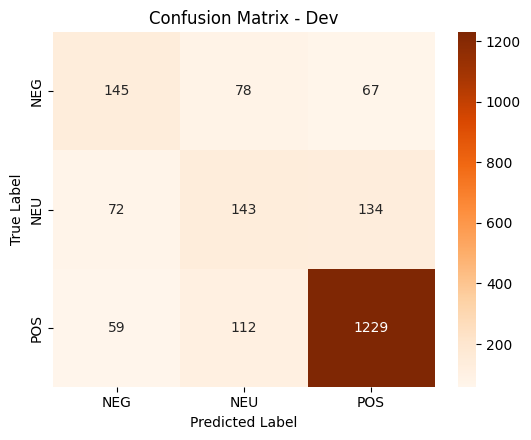


🔍 Evaluation on Test set:
Accuracy : 0.7303
Precision (macro): 0.5922
Recall (macro)   : 0.5871
F1-score (macro) : 0.5893

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.51      0.48      0.49       290
         NEU       0.40      0.43      0.42       349
         POS       0.86      0.86      0.86      1400

    accuracy                           0.73      2039
   macro avg       0.59      0.59      0.59      2039
weighted avg       0.73      0.73      0.73      2039



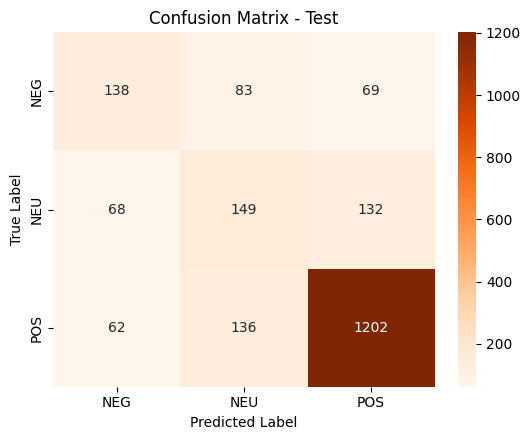

In [12]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
dt_best_params, results_df = tune_decision_tree_gridsearch(X_train, y_train)
print("Best parameters:", dt_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
dt_model = DecisionTreeClassifier(**dt_best_params)
dt_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = dt_model.predict(X_dev)
y_test_pred = dt_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

## 6. Random Forest

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🔍 Evaluation on Dev set:
Accuracy : 0.8239
Precision (macro): 0.7736
Recall (macro)   : 0.6594
F1-score (macro) : 0.6967

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.78      0.62      0.69       290
         NEU       0.69      0.38      0.49       349
         POS       0.85      0.98      0.91      1400

    accuracy                           0.82      2039
   macro avg       0.77      0.66      0.70      2039
weighted avg       0.81      0.82      0.80      2039



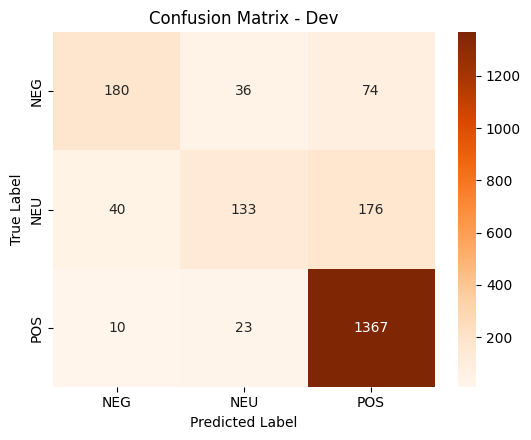


🔍 Evaluation on Test set:
Accuracy : 0.8279
Precision (macro): 0.7805
Recall (macro)   : 0.6703
F1-score (macro) : 0.708

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.79      0.63      0.70       290
         NEU       0.70      0.41      0.52       349
         POS       0.85      0.97      0.91      1400

    accuracy                           0.83      2039
   macro avg       0.78      0.67      0.71      2039
weighted avg       0.82      0.83      0.81      2039



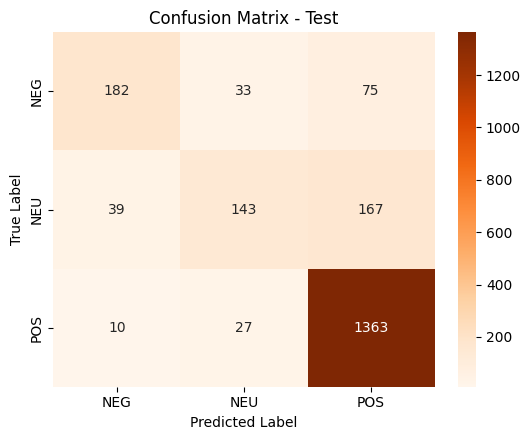

In [13]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
rf_best_params, results_df = tune_random_forest_gridsearch(X_train, y_train)
print("Best parameters:", rf_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = rf_model.predict(X_dev)
y_test_pred = rf_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

## 7. LightGBM

In [18]:
y_train

4889    2
6549    2
2819    1
9185    2
752     1
       ..
2869    1
6076    2
7992    2
5158    2
6662    2
Name: label_encoded, Length: 6116, dtype: int64

In [ ]:
X
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
lightgbm_best_params, results_df = tune_lightgbm_gridsearch(X_train, y_train)
print("Best parameters:", lightgbm_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
lightgbm_model = LGBMClassifier(**lightgbm_best_params)
lightgbm_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = lightgbm_model.predict(X_dev)
y_test_pred = lightgbm_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})


/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/utils/valida

KeyboardInterrupt: 

## 8. XGBoost

In [23]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
xgboost_best_params, results_df = tune_xgboost_gridsearch(X_train, y_train)
print("Best parameters:", xgboost_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
xgboost_model = XGBClassifier(**xgboost_best_params)
xgboost_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = xgboost_model.predict(X_dev)
y_test_pred = xgboost_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})


KeyboardInterrupt: 

## 9. CatBoost

### Train with embeddings_array only (LaBSE)

Best parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
0:	learn: 1.0154356	total: 163ms	remaining: 48.6s
1:	learn: 0.9450032	total: 335ms	remaining: 50s
2:	learn: 0.8868373	total: 533ms	remaining: 52.8s
3:	learn: 0.8375668	total: 722ms	remaining: 53.5s
4:	learn: 0.7923721	total: 916ms	remaining: 54s
5:	learn: 0.7557962	total: 1.09s	remaining: 53.4s
6:	learn: 0.7253490	total: 1.27s	remaining: 53.2s
7:	learn: 0.6977759	total: 1.45s	remaining: 52.9s
8:	learn: 0.6720882	total: 1.64s	remaining: 52.9s
9:	learn: 0.6511645	total: 1.8s	remaining: 52.3s
10:	learn: 0.6302753	total: 1.99s	remaining: 52.4s
11:	learn: 0.6118848	total: 2.17s	remaining: 52.1s
12:	learn: 0.5941281	total: 2.38s	remaining: 52.6s
13:	learn: 0.5797595	total: 2.58s	remaining: 52.7s
14:	learn: 0.5660064	total: 2.76s	remaining: 52.5s
15:	learn: 0.5527921	total: 2.94s	remaining: 52.2s
16:	learn: 0.5401910	total: 3.12s	remaining: 51.9s
17:	learn: 0.5287259	total: 3.29s	remaining: 51.6s
18:	learn: 0.5173113	total

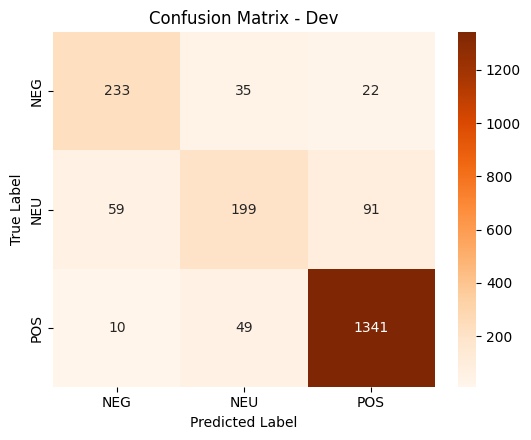


🔍 Evaluation on Test set:
Accuracy : 0.8695
Precision (macro): 0.8066
Recall (macro)   : 0.778
F1-score (macro) : 0.7913

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.80      0.76      0.78       290
         NEU       0.70      0.62      0.66       349
         POS       0.92      0.95      0.94      1400

    accuracy                           0.87      2039
   macro avg       0.81      0.78      0.79      2039
weighted avg       0.86      0.87      0.87      2039



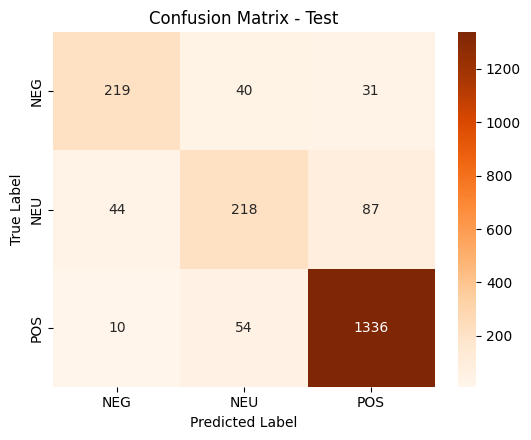

In [ ]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
catboost_best_params, results_df = tune_catboost_gridsearch(X_train, y_train)
print("Best parameters:", catboost_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
catboost_model = CatBoostClassifier(**catboost_best_params)
catboost_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = catboost_model.predict(X_dev)
y_test_pred = catboost_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array XLM-R
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ XLM-R và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
0:	learn: 0.9983431	total: 185ms	remaining: 55.2s
1:	learn: 0.9230918	total: 268ms	remaining: 39.9s
2:	learn: 0.8565439	total: 342ms	remaining: 33.8s
3:	learn: 0.8015936	total: 420ms	remaining: 31.1s
4:	learn: 0.7560909	total: 494ms	remaining: 29.1s
5:	learn: 0.7135822	total: 569ms	remaining: 27.9s
6:	learn: 0.6765355	total: 643ms	remaining: 26.9s
7:	learn: 0.6453366	total: 722ms	remaining: 26.4s
8:	learn: 0.6185715	total: 851ms	remaining: 27.5s
9:	learn: 0.5948067	total: 983ms	remaining: 28.5s
10:	learn: 0.5756409	total: 1.13s	remaining: 29.8s
11:	learn: 0.5576876	total: 1.31s	remaining: 31.4s
12:	learn: 0.5404539	total: 1.53s	remaining: 33.7s
13:	learn: 0.5244993	total: 1.72s	remaining: 35.2s
14:	learn: 0.5088750	total: 1.91s	remaining: 36.3s
15:	learn: 0.4943901	total: 2.08s	remaining: 36.9s
16:	learn: 0.4812473	total: 2.26s	remaining: 37.7s
17:	learn: 0.469485

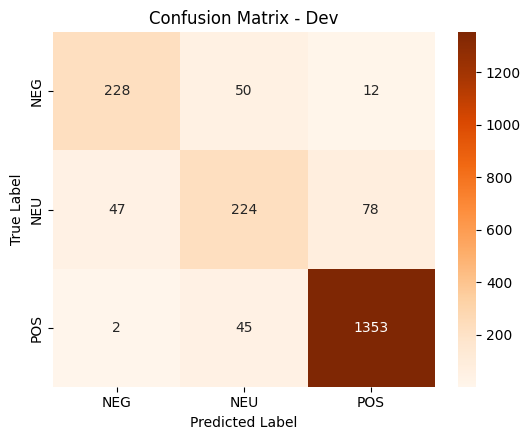


🔍 Evaluation on Test set:
Accuracy : 0.8843
Precision (macro): 0.8268
Recall (macro)   : 0.797
F1-score (macro) : 0.8109

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.85      0.79      0.82       290
         NEU       0.69      0.64      0.67       349
         POS       0.93      0.97      0.95      1400

    accuracy                           0.88      2039
   macro avg       0.83      0.80      0.81      2039
weighted avg       0.88      0.88      0.88      2039



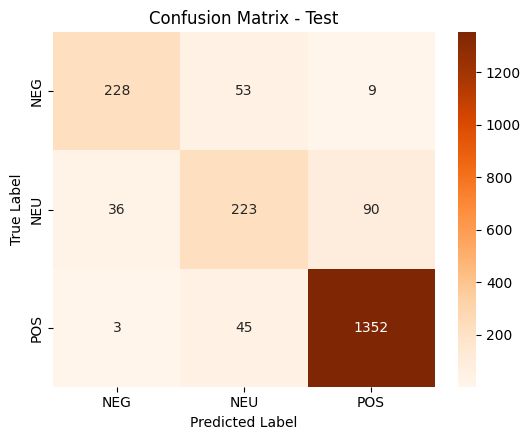

In [64]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array_xlmr, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 6. Train lại với hyperparmeter đã tuning
catboost_model_3 = CatBoostClassifier(**catboost_best_params)
catboost_model_3.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = catboost_model_3.predict(X_dev)
y_test_pred = catboost_model_3.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array LaBSE
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ LaBSE và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})
0:	learn: 1.0032893	total: 227ms	remaining: 1m 7s
1:	learn: 0.9197098	total: 375ms	remaining: 55.9s
2:	learn: 0.8583308	total: 471ms	remaining: 46.6s
3:	learn: 0.8016922	total: 563ms	remaining: 41.6s
4:	learn: 0.7538304	total: 642ms	remaining: 37.9s
5:	learn: 0.7132509	total: 731ms	remaining: 35.8s
6:	learn: 0.6769417	total: 811ms	remaining: 34s
7:	learn: 0.6489646	total: 885ms	remaining: 32.3s
8:	learn: 0.6225249	total: 963ms	remaining: 31.1s
9:	learn: 0.5997196	total: 1.04s	remaining: 30.2s
10:	learn: 0.5776355	total: 1.12s	remaining: 29.3s
11:	learn: 0.5589291	total: 1.2s	remaining: 28.8s
12:	learn: 0.5403647	total: 1.3s	remaining: 28.7s
13:	learn: 0.5261977	total: 1.45s	remaining: 29.7s
14:	learn: 0.5123925	total: 1.62s	remaining: 30.7s
15:	learn: 0.4986349	total: 1.78s	remaining: 31.6s
16:	learn: 0.4847802	total: 1.94s	remaining: 32.4s
17:	learn: 0.4723323	to

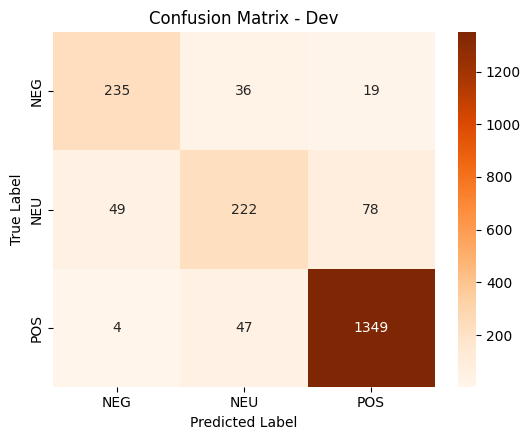


🔍 Evaluation on Test set:
Accuracy : 0.8813
Precision (macro): 0.8202
Recall (macro)   : 0.7979
F1-score (macro) : 0.8083

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.83      0.80      0.82       290
         NEU       0.70      0.63      0.66       349
         POS       0.93      0.96      0.95      1400

    accuracy                           0.88      2039
   macro avg       0.82      0.80      0.81      2039
weighted avg       0.88      0.88      0.88      2039



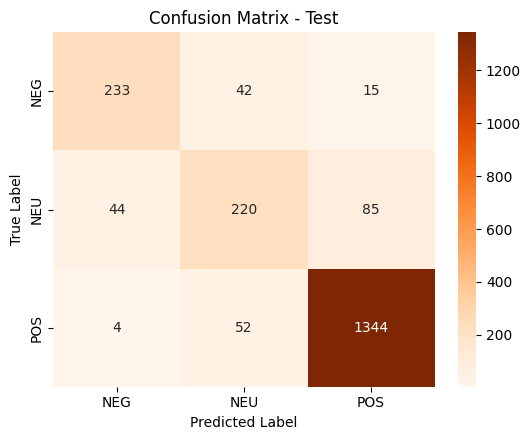

In [43]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 6. Train lại với hyperparmeter đã tuning
catboost_model = CatBoostClassifier(**catboost_best_params)
catboost_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = catboost_model.predict(X_dev)
y_test_pred = catboost_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

## 10. Multilayer Perceptron

### Train with embeddings_array only (LaBSE)

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})


/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kittnguyen/Documents/DS304_Project/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

🔍 Evaluation on Dev set:
Accuracy : 0.8602
Precision (macro): 0.7738
Recall (macro)   : 0.7611
F1-score (macro) : 0.7664

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.76      0.78      0.77       290
         NEU       0.63      0.55      0.59       349
         POS       0.93      0.95      0.94      1400

    accuracy                           0.86      2039
   macro avg       0.77      0.76      0.77      2039
weighted avg       0.85      0.86      0.86      2039



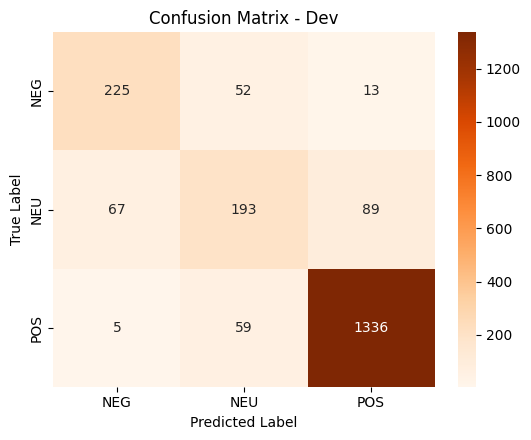


🔍 Evaluation on Test set:
Accuracy : 0.8676
Precision (macro): 0.7853
Recall (macro)   : 0.7769
F1-score (macro) : 0.7809

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.77      0.77      0.77       290
         NEU       0.65      0.61      0.63       349
         POS       0.94      0.95      0.95      1400

    accuracy                           0.87      2039
   macro avg       0.79      0.78      0.78      2039
weighted avg       0.86      0.87      0.87      2039



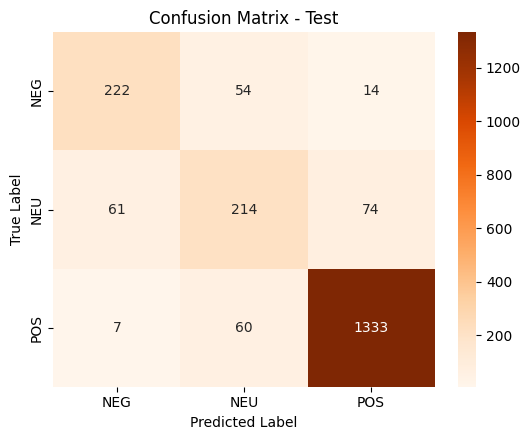

In [22]:
# Bước 2. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X, y)

# Bước 5. Naive Bayes hyperparameter tunning
mlp_best_params, results_df = tune_mlp_gridsearch(X_train, y_train)
print("Best parameters:", mlp_best_params)

# Bước 6. Train lại với hyperparmeter đã tuning
mlp_model = MLPClassifier(**mlp_best_params)
mlp_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = mlp_model.predict(X_dev)
y_test_pred = mlp_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array XLM-R
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ XLM-R và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})

🔍 Evaluation on Dev set:
Accuracy : 0.8965
Precision (macro): 0.8366
Recall (macro)   : 0.8352
F1-score (macro) : 0.8359

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.85      0.84      0.84       290
         NEU       0.71      0.71      0.71       349
         POS       0.95      0.95      0.95      1400

    accuracy                           0.90      2039
   macro avg       0.84      0.84      0.84      2039
weighted avg       0.90      0.90      0.90      2039



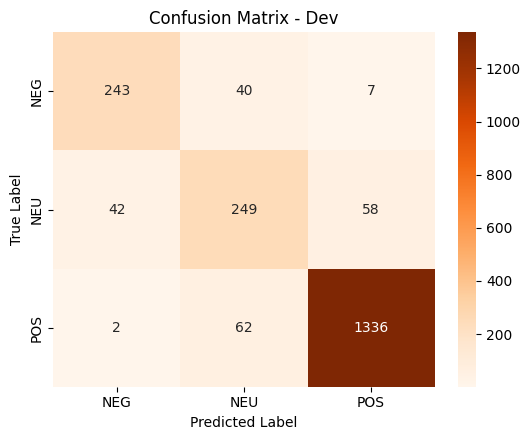


🔍 Evaluation on Test set:
Accuracy : 0.8985
Precision (macro): 0.8401
Recall (macro)   : 0.8366
F1-score (macro) : 0.8379

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.86      0.81      0.83       290
         NEU       0.71      0.75      0.73       349
         POS       0.96      0.95      0.96      1400

    accuracy                           0.90      2039
   macro avg       0.84      0.84      0.84      2039
weighted avg       0.90      0.90      0.90      2039



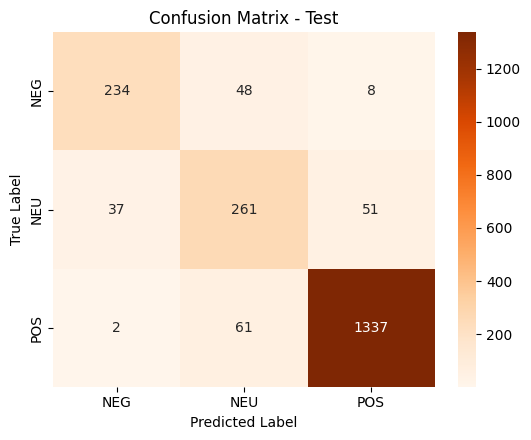

In [65]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array_xlmr, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 6. Train lại với hyperparmeter đã tuning
mlp_model_3 = MLPClassifier(**mlp_best_params)
mlp_model_3.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = mlp_model_3.predict(X_dev)
y_test_pred = mlp_model_3.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])

### Train with embeddings_array LaBSE
Huấn luyện mô hình với sự kết hợp từ embedding_arrays từ LaBSE và 5 features Word_Count, language_encoded, Review_Weeks_Ago, Review_Years_Ago, Review_Months_Ago

Train: Counter({2: 4200, 1: 1046, 0: 870})
Dev: Counter({2: 1400, 1: 349, 0: 290})
Test: Counter({2: 1400, 1: 349, 0: 290})

🔍 Evaluation on Dev set:
Accuracy : 0.8798
Precision (macro): 0.8144
Recall (macro)   : 0.795
F1-score (macro) : 0.8038

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.75      0.79       290
         NEU       0.66      0.68      0.67       349
         POS       0.94      0.96      0.95      1400

    accuracy                           0.88      2039
   macro avg       0.81      0.80      0.80      2039
weighted avg       0.88      0.88      0.88      2039



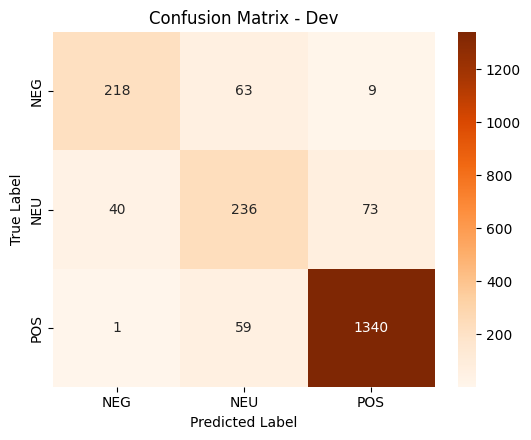


🔍 Evaluation on Test set:
Accuracy : 0.8808
Precision (macro): 0.8163
Recall (macro)   : 0.7998
F1-score (macro) : 0.8071

📋 Classification Report:
              precision    recall  f1-score   support

         NEG       0.84      0.75      0.79       290
         NEU       0.66      0.69      0.68       349
         POS       0.94      0.95      0.95      1400

    accuracy                           0.88      2039
   macro avg       0.82      0.80      0.81      2039
weighted avg       0.88      0.88      0.88      2039



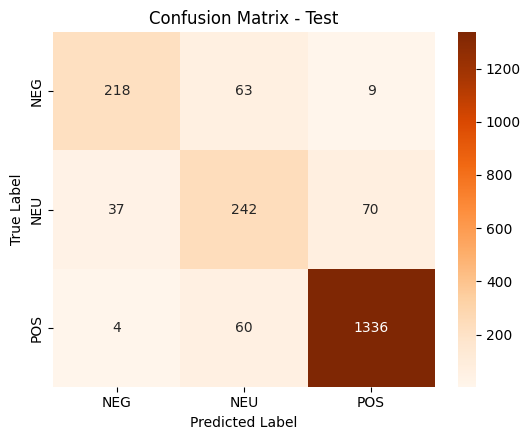

In [42]:
# 1. Chọn các đặc trưng tabular
tabular_features = ['Word_Count', 'language_encoded', 'Review_Weeks_Ago', 
                    'Review_Months_Ago', 'Review_Years_Ago', 'Rating_Score']

# 2. Chuẩn hoá các đặc trưng tabular
scaler = StandardScaler()
X_tabular = scaler.fit_transform(df[tabular_features])

# 3. Ghép embedding với tabular features
X_combined = np.hstack([embeddings_array, X_tabular])

# 4. Chuẩn bị nhãn
y = df['label_encoded']

# Bước 1. Tách tập Train và Test
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test (X_combined, y)

# Bước 6. Train lại với hyperparmeter đã tuning
mlp_model = MLPClassifier(**mlp_best_params)
mlp_model.fit(X_train, y_train)

# Bước 7. Dự đoán và dánh giá trên tập dev và test
y_dev_pred = mlp_model.predict(X_dev)
y_test_pred = mlp_model.predict(X_test)

evaluate_model (y_dev, y_dev_pred, dataset_name="Dev", target_names=['NEG', 'NEU', 'POS'])
evaluate_model (y_test, y_test_pred, dataset_name="Test", target_names=['NEG', 'NEU', 'POS'])